# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [125]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
import itertools
import warnings

from pandas import set_option
plt.style.use('ggplot')
pd.set_option('display.max_columns', 1000)
%matplotlib inline 
import warnings; warnings.simplefilter('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from IPython.display import Image  
import pydotplus

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 

from scipy.stats import randint

from sklearn.linear_model import LogisticRegression 

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.utils import resample

## 1. Data Cleaning

In [84]:
df = pd.read_csv('training_data.csv', index_col=0)

In [3]:
df.Y.value_counts() #Non-Default vs Default split

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [85]:
df_og = df #For the Final Model

In [5]:
df.sort_values(by='X1', ascending=False,inplace=True) #Sorting by Limit Balance
df.columns = df.iloc[0] #Row[0] is now column header
data = df[df.SEX != "SEX"] #Deletes out ID row
data.rename(columns={"default payment next month": "DEFAULT"},inplace=True) #Renaming Final column to Default

In [6]:
data = data.astype(float) #Coverting all types to float
data['EDUCATION']=np.where(data['EDUCATION']>4,4,data['EDUCATION']) #All non 1, 2,& 3 is now 4
data['EDUCATION']=np.where(data['EDUCATION']<1,4,data['EDUCATION']) #All non 1, 2,& 3 is now 4
data['MARRIAGE']=np.where(data['MARRIAGE']<1,3,data['MARRIAGE']) #All non 1, 2, & 3 is now 3

In [7]:
data.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
23626,90000.0,2.0,3.0,1.0,36.0,0.0,0.0,-1.0,0.0,0.0,0.0,79642.0,79001.0,18318.0,18982.0,19371.0,19608.0,1580.0,19789.0,1295.0,1000.0,849.0,1000.0,0.0
9489,90000.0,1.0,3.0,2.0,25.0,0.0,0.0,0.0,0.0,-2.0,-2.0,6822.0,6995.0,7884.0,0.0,0.0,0.0,1172.0,1061.0,0.0,0.0,0.0,193.0,1.0
27783,90000.0,2.0,1.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,6090.0,7477.0,8848.0,10135.0,11731.0,8138.0,1500.0,1500.0,1500.0,2000.0,1500.0,1000.0,0.0
1940,90000.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,38921.0,45577.0,46496.0,40244.0,39903.0,8629.0,12000.0,5000.0,3000.0,10000.0,1000.0,1838.0,0.0
18657,90000.0,2.0,2.0,2.0,26.0,1.0,2.0,2.0,2.0,2.0,2.0,86335.0,88520.0,90311.0,91431.0,92840.0,91205.0,4500.0,4100.0,3500.0,3800.0,0.0,3500.0,0.0


## 2. EDA

In [8]:
clean_df = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True) #Creating dummies

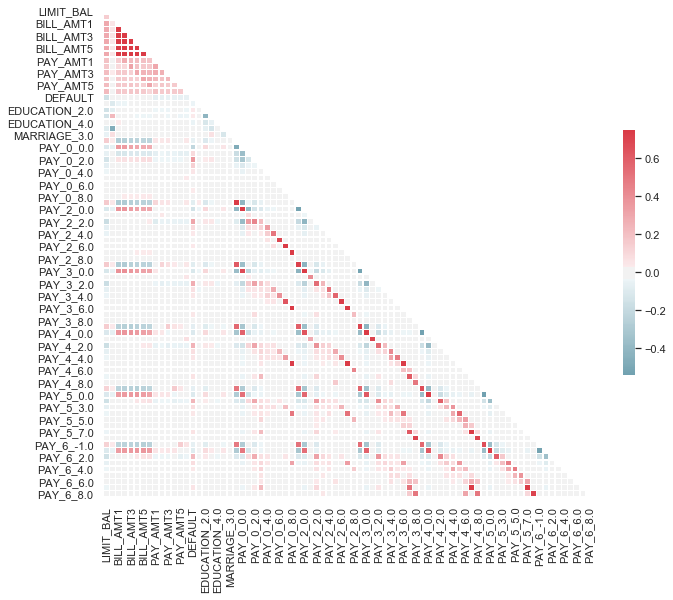

In [9]:
#Heatmap to visualize correlations
sns.set(style="white")
corr = clean_df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

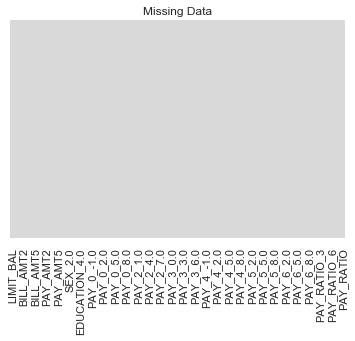

In [81]:
#No Missing Data
sns.heatmap(clean_df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

## 3. Feature Engineering

In [10]:
#Creating monthly Pay Ratio feature
clean_df['PAY_RATIO_1'] = (clean_df['PAY_AMT1']/clean_df['BILL_AMT1'])
clean_df['PAY_RATIO_2'] = (clean_df['PAY_AMT2']/clean_df['BILL_AMT2'])
clean_df['PAY_RATIO_3'] = (clean_df['PAY_AMT3']/clean_df['BILL_AMT3'])
clean_df['PAY_RATIO_4'] = (clean_df['PAY_AMT4']/clean_df['BILL_AMT4'])
clean_df['PAY_RATIO_5'] = (clean_df['PAY_AMT5']/clean_df['BILL_AMT5'])
clean_df['PAY_RATIO_6'] = (clean_df['PAY_AMT6']/clean_df['BILL_AMT6'])

In [11]:
#Filling NaN's
clean_df.PAY_RATIO_1.fillna(1, inplace=True)
clean_df.PAY_RATIO_2.fillna(1, inplace=True)
clean_df.PAY_RATIO_3.fillna(1, inplace=True)
clean_df.PAY_RATIO_4.fillna(1, inplace=True)
clean_df.PAY_RATIO_5.fillna(1, inplace=True)
clean_df.PAY_RATIO_6.fillna(1, inplace=True)

In [12]:
#Ensuring Pay Ratio falls between 0 & 1
clean_df.PAY_RATIO_1 = np.where(((clean_df.PAY_RATIO_1 < 0)|(clean_df.PAY_RATIO_1 > 1)), 1, clean_df.PAY_RATIO_1)
clean_df.PAY_RATIO_2 = np.where(((clean_df.PAY_RATIO_2 < 0)|(clean_df.PAY_RATIO_2 > 1)), 1, clean_df.PAY_RATIO_2)
clean_df.PAY_RATIO_3 = np.where(((clean_df.PAY_RATIO_3 < 0)|(clean_df.PAY_RATIO_3 > 1)), 1, clean_df.PAY_RATIO_3)
clean_df.PAY_RATIO_4 = np.where(((clean_df.PAY_RATIO_4 < 0)|(clean_df.PAY_RATIO_4 > 1)), 1, clean_df.PAY_RATIO_4)
clean_df.PAY_RATIO_5 = np.where(((clean_df.PAY_RATIO_5 < 0)|(clean_df.PAY_RATIO_5 > 1)), 1, clean_df.PAY_RATIO_5)
clean_df.PAY_RATIO_6 = np.where(((clean_df.PAY_RATIO_6 < 0)|(clean_df.PAY_RATIO_6 > 1)), 1, clean_df.PAY_RATIO_6)

In [13]:
#Creating 6-month Avg Bill Statment and 6-month avg Amount Paid
clean_df['AVG_BILL_STMT'] = (clean_df['BILL_AMT1']+clean_df['BILL_AMT2']+clean_df['BILL_AMT3']+clean_df['BILL_AMT4']+clean_df['BILL_AMT5']+clean_df['BILL_AMT6'])/6
clean_df['AVG_AMT_PAID'] = (clean_df['PAY_AMT1']+clean_df['PAY_AMT2']+clean_df['PAY_AMT3']+clean_df['PAY_AMT4']+clean_df['PAY_AMT5']+clean_df['PAY_AMT6'])/6

In [14]:
#Creating 6-month Avg Pay Ratio
clean_df['PAY_RATIO']= clean_df['AVG_AMT_PAID']/clean_df['AVG_BILL_STMT']

In [15]:
#Filling NaN's & ensuring Pay Ratio falls between 0 & 1
clean_df.PAY_RATIO.fillna(1, inplace=True)
clean_df.replace(np.inf, 1, inplace=True)
clean_df.PAY_RATIO = np.where(((clean_df.PAY_RATIO < 0)|(clean_df.PAY_RATIO > 1)), 1, clean_df.PAY_RATIO)

In [16]:
clean_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,PAY_RATIO_1,PAY_RATIO_2,PAY_RATIO_3,PAY_RATIO_4,PAY_RATIO_5,PAY_RATIO_6,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
23626,90000.0,36.0,79642.0,79001.0,18318.0,18982.0,19371.0,19608.0,1580.0,19789.0,1295.0,1000.0,849.0,1000.0,0.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.019839,0.250491,0.070695,0.052681,0.043828,0.051000,39153.666667,4252.166667,0.108602
9489,90000.0,25.0,6822.0,6995.0,7884.0,0.0,0.0,0.0,1172.0,1061.0,0.0,0.0,0.0,193.0,1.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.171797,0.151680,0.000000,1.000000,1.000000,1.000000,3616.833333,404.333333,0.111792
27783,90000.0,25.0,6090.0,7477.0,8848.0,10135.0,11731.0,8138.0,1500.0,1500.0,1500.0,2000.0,1500.0,1000.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.246305,0.200615,0.169530,0.197336,0.127866,0.122880,8736.500000,1500.000000,0.171693
1940,90000.0,30.0,38921.0,45577.0,46496.0,40244.0,39903.0,8629.0,12000.0,5000.0,3000.0,10000.0,1000.0,1838.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.308317,0.109704,0.064522,0.248484,0.025061,0.213003,36628.333333,5473.000000,0.149420
18657,90000.0,26.0,86335.0,88520.0,90311.0,91431.0,92840.0,91205.0,4500.0,4100.0,3500.0,3800.0,0.0,3500.0,0.0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.052123,0.046317,0.038755,0.041561,0.000000,0.038375,90107.000000,3233.333333,0.035883


In [17]:
clean_df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,MARRIAGE_2.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_0_0.0,PAY_0_1.0,PAY_0_2.0,PAY_0_3.0,PAY_0_4.0,PAY_0_5.0,PAY_0_6.0,PAY_0_7.0,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,PAY_2_2.0,PAY_2_3.0,PAY_2_4.0,PAY_2_5.0,PAY_2_6.0,PAY_2_7.0,PAY_2_8.0,PAY_3_-1.0,PAY_3_0.0,PAY_3_1.0,PAY_3_2.0,PAY_3_3.0,PAY_3_4.0,PAY_3_5.0,PAY_3_6.0,PAY_3_7.0,PAY_3_8.0,PAY_4_-1.0,PAY_4_0.0,PAY_4_1.0,PAY_4_2.0,PAY_4_3.0,PAY_4_4.0,PAY_4_5.0,PAY_4_6.0,PAY_4_7.0,PAY_4_8.0,PAY_5_-1.0,PAY_5_0.0,PAY_5_2.0,PAY_5_3.0,PAY_5_4.0,PAY_5_5.0,PAY_5_6.0,PAY_5_7.0,PAY_5_8.0,PAY_6_-1.0,PAY_6_0.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0,PAY_RATIO_1,PAY_RATIO_2,PAY_RATIO_3,PAY_RATIO_4,PAY_RATIO_5,PAY_RATIO_6,AVG_BILL_STMT,AVG_AMT_PAID,PAY_RATIO
count,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,35.447931,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477,0.603227,0.467399,0.165030,0.015601,0.534513,0.012356,0.189875,0.491444,0.122228,0.090315,0.010623,0.002267,0.000889,0.000400,0.000267,0.000667,0.201164,0.524646,0.001067,0.131873,0.011156,0.003111,0.000844,0.000356,0.000711,0.000044,0.198409,0.525490,0.000178,0.128495,0.007867,0.002578,0.000667,0.000844,0.000978,0.000089,0.190275,0.548024,0.000089,0.106227,0.006134,0.002178,0.001244,0.000222,0.002089,0.000089,0.183297,0.564736,0.089515,0.005689,0.002622,0.000711,0.000133,0.002089,0.000044,0.190408,0.543713,0.092360,0.006222,0.001689,0.000400,0.000622,0.001689,0.000089,0.303204,0.315860,0.311864,0.306397,0.328164,0.348377,45078.972125,5292.854497,0.344726
std,129864.960118,9.237634,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584,0.489239,0.498947,0.371215,0.123927,0.498819,0.110472,0.392211,0.499938,0.327556,0.286639,0.102520,0.047558,0.029802,0.019997,0.016328,0.025812,0.400880,0.499403,0.032644,0.338360,0.105034,0.055693,0.029048,0.018854,0.026658,0.006667,0.398811,0.499361,0.013333,0.334647,0.088349,0.050709,0.025812,0.029048,0.031256,0.009428,0.392527,0.497699,0.009428,0.308135,0.078079,0.046618,0.035256,0.014906,0.045659,0.009428,0.386918,0.495803,0.285492,0.075213,0.051143,0.026658,0.011547,0.045659,0.006667,0.392632,0.498097,0.289539,0.078639,0.041063,0.019997,0.024938,0.041063,0.009428,0.392584,0.401119,0.407479,0.408008,0.417028,0.425910,63716.533656,10528.220177,0.380805
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

## 4. Feature Selection

In [18]:
#Establishing Target and Features
target = clean_df['DEFAULT'] 
features = clean_df.drop(['DEFAULT'], axis=1)

In [19]:
#Test Train Split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(features, target, random_state=22,test_size=0.20)

In [20]:
scaler = StandardScaler()
#Fitting Scaler to Training Data
scaler.fit(X_train_fs)
#Transforming Training Data
X_train_fs = pd.DataFrame(data = scaler.transform(X_train_fs), columns = features.columns)
#Transforming Testing Data
X_test_fs = pd.DataFrame(data = scaler.transform(X_test_fs), columns = features.columns)

In [21]:
#Training Model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, normalize = False)
lasso = lasso.fit(X_train_fs, y_train_fs)
y_train_pred_fs = lasso.predict(X_train_fs)
y_pred_fs = lasso.predict(X_test_fs)
train_rmse_fs = np.sqrt(metrics.mean_squared_error(y_train_fs, y_train_pred_fs))
test_rmse_fs = np.sqrt(metrics.mean_squared_error(y_test_fs, y_pred_fs))
print('Training Root Mean Squared Error:' , train_rmse_fs)
print("Testing Rooot Mean Squared Error:" , test_rmse_fs)
#Print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train_fs, (y_train_pred_fs)))
print("R^2 Test Score:", metrics.r2_score(y_test_fs, y_pred_fs))

Training Root Mean Squared Error: 0.3733665864933406
Testing Rooot Mean Squared Error: 0.36789937796376926
R^2 Train Score: 0.19734771596730039
R^2 Test Score: 0.2174625790902156


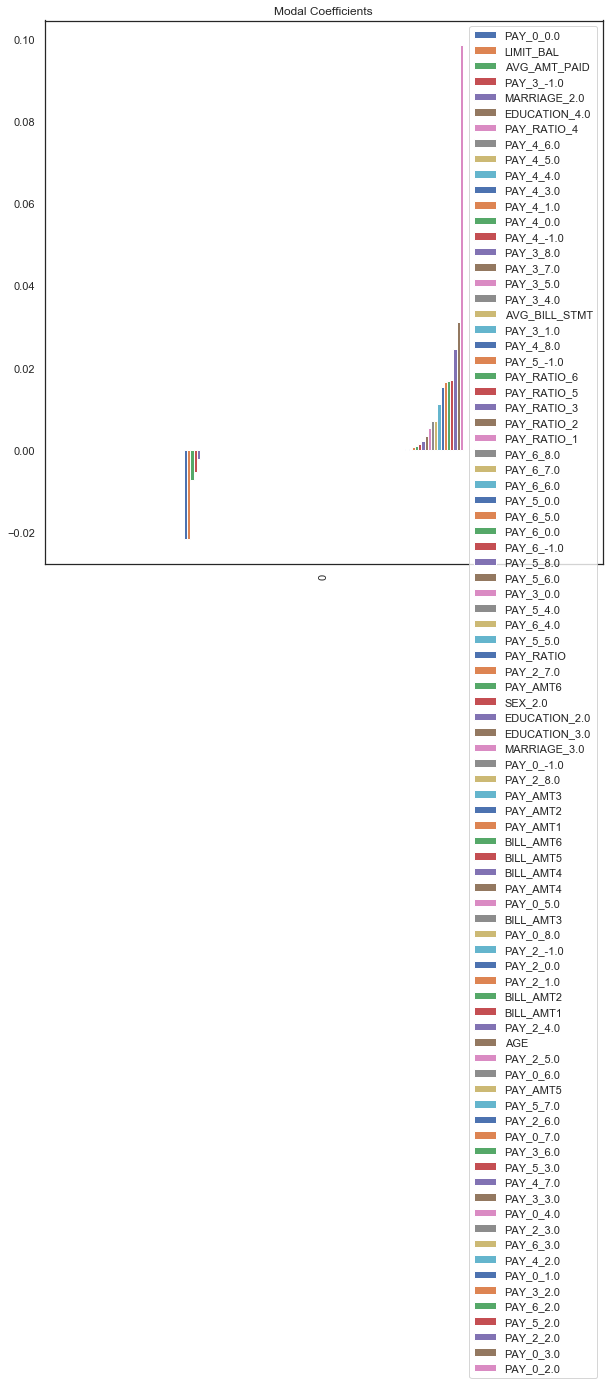

In [22]:
#Creating Lasso Visual
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train_fs.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

In [23]:
#Viewing Lasso Coefficients
lasso_coef01

,PAY_0_0.0,LIMIT_BAL,AVG_AMT_PAID,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,PAY_RATIO_4,PAY_4_6.0,PAY_4_5.0,PAY_4_4.0,PAY_4_3.0,PAY_4_1.0,PAY_4_0.0,PAY_4_-1.0,PAY_3_8.0,PAY_3_7.0,PAY_3_5.0,PAY_3_4.0,AVG_BILL_STMT,PAY_3_1.0,PAY_4_8.0,PAY_5_-1.0,PAY_RATIO_6,PAY_RATIO_5,PAY_RATIO_3,PAY_RATIO_2,PAY_RATIO_1,PAY_6_8.0,PAY_6_7.0,PAY_6_6.0,PAY_5_0.0,PAY_6_5.0,PAY_6_0.0,PAY_6_-1.0,PAY_5_8.0,PAY_5_6.0,PAY_3_0.0,PAY_5_4.0,PAY_6_4.0,PAY_5_5.0,PAY_RATIO,PAY_2_7.0,PAY_AMT6,SEX_2.0,EDUCATION_2.0,EDUCATION_3.0,MARRIAGE_3.0,PAY_0_-1.0,PAY_2_8.0,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT4,PAY_0_5.0,BILL_AMT3,PAY_0_8.0,PAY_2_-1.0,PAY_2_0.0,PAY_2_1.0,BILL_AMT2,BILL_AMT1,PAY_2_4.0,AGE,PAY_2_5.0,PAY_0_6.0,PAY_AMT5,PAY_5_7.0,PAY_2_6.0,PAY_0_7.0,PAY_3_6.0,PAY_5_3.0,PAY_4_7.0,PAY_3_3.0,PAY_0_4.0,PAY_2_3.0,PAY_6_3.0,PAY_4_2.0,PAY_0_1.0,PAY_3_2.0,PAY_6_2.0,PAY_5_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
0,-0.021765,-0.021611,-0.007252,-0.00528,-0.002188,-0.000004,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.000195,0.000275,0.00084,0.001086,0.001405,0.002184,0.003381,0.005318,0.007113,0.007173,0.011139,0.015271,0.016601,0.016919,0.016992,0.024712,0.031242,0.098566


In [24]:
#Working DF will only contain non-0coef features
working_df = clean_df[['DEFAULT','PAY_0_0.0','LIMIT_BAL','AVG_AMT_PAID','PAY_3_-1.0','MARRIAGE_2.0','EDUCATION_4.0','PAY_5_7.0','PAY_2_6.0','PAY_0_7.0','PAY_3_6.0','PAY_5_3.0','PAY_4_7.0','PAY_3_3.0','PAY_0_4.0','PAY_2_3.0','PAY_6_3.0','PAY_4_2.0','PAY_0_1.0','PAY_3_2.0','PAY_6_2.0','PAY_5_2.0','PAY_2_2.0','PAY_0_3.0','PAY_0_2.0']]

In [25]:
working_df.head()

,DEFAULT,PAY_0_0.0,LIMIT_BAL,AVG_AMT_PAID,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,PAY_5_7.0,PAY_2_6.0,PAY_0_7.0,PAY_3_6.0,PAY_5_3.0,PAY_4_7.0,PAY_3_3.0,PAY_0_4.0,PAY_2_3.0,PAY_6_3.0,PAY_4_2.0,PAY_0_1.0,PAY_3_2.0,PAY_6_2.0,PAY_5_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
23626,0.0,1,90000.0,4252.166667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9489,1.0,1,90000.0,404.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27783,0.0,1,90000.0,1500.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1940,0.0,1,90000.0,5473.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18657,0.0,0,90000.0,3233.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0


## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [26]:
#Establishing Target and Features from Working DF
target = working_df['DEFAULT']
features = working_df.drop(['DEFAULT'], axis=1)

In [27]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [28]:
scaler = StandardScaler()
#Fitting Scaler to Training Data
scaler.fit(X_train)
#Transforming Training Data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#Transforming Testing Data
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=9)

In [30]:
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_f1 = metrics.f1_score(y_test, knn_preds)
knn_acc = metrics.accuracy_score(y_test, knn_preds)
print('Test F1 score: ', knn_f1)
print('Test Accuracy score: ', knn_acc)

Test F1 score:  0.4742396027312229
Test Accuracy score:  0.8117777777777778


### Logistic Regression

In [31]:
lr = LogisticRegression(class_weight='balanced')

In [32]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lr_preds = lr.predict(X_test)
lr_f1 = metrics.f1_score(y_test, lr_preds)
lr_acc = metrics.accuracy_score(y_test, lr_preds)
print('Test F1 score: ', lr_f1)
print('Test Accuracy score: ', lr_acc)

Test F1 score:  0.5546461242176216
Test Accuracy score:  0.7944444444444444


### Decision Tree

In [34]:
dtc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dtc.fit(X_train, y_train)
dtc_preds  = dtc.predict(X_test)
dtc_f1 = metrics.f1_score(y_test, dtc_preds)
dtc_acc = metrics.accuracy_score(y_test, dtc_preds)
print('Test F1 score: ', dtc_f1)
print('Test Accuracy score: ', dtc_acc)

Test F1 score:  0.5217391304347825
Test Accuracy score:  0.7702222222222223


### Random Forest

In [35]:
#Instantiating Classifier using 100 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, n_estimators=100, max_depth=9, max_features=3)

In [36]:
#Fitting Model to Training Data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [37]:
#Using Fitted Model to Predict Test Data
rfc_preds = rfc.predict(X_test)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
rfc_acc = metrics.accuracy_score(y_test, rfc_preds)
#Checking Accuracy on Test Data
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)

Test F1 score:  0.46277665995975853
Test Accuracy score:  0.822


## 6. Model Evaluation

### Voting Classifier

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', dtc)], 
                voting='soft')
voting_clf.fit(X_train, y_train)
vc_preds = voting_clf.predict(X_test)
vc_f1 = metrics.f1_score(y_test, vc_preds)
vc_acc = metrics.accuracy_score(y_test, vc_preds)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Test F1 score:  0.5540106951871658
Test Accuracy score:  0.8146666666666667


### Gridsearch CV - Logistic Regression

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#Creating Dictionary of Parameters to Tune
param_grid = { 
    'C':[0.001,0.01,0.1,1],
    'penalty':['l1', 'l2']
}

In [42]:
lr_CV = LogisticRegression(random_state = 1, class_weight='balanced')

In [43]:
#Creating Grid Search Object and Fitting to Data
lr_CV = GridSearchCV(estimator=lr_CV, param_grid=param_grid, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
lr_CV.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [44]:
#Identifying Best Parameters 
print(lr_CV.best_params_)
print(lr_CV.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(lr_CV.best_score_)

{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.5256760504729


In [45]:
#Predicting Test Set
test_preds_lr_CV = lr_CV.best_estimator_.predict(X_test)
#Checking Accuracy and F1 scores
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_lr_CV))
print("F1:",metrics.f1_score(y_test, test_preds_lr_CV))

Accuracy: 0.8002222222222222
F1: 0.5603911980440097


In [46]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', dtc), ('randomforest', rfc), ('logregCV', lr_CV)], 
                voting='hard')
voting_clf.fit(X_train, y_train)
vc_preds = voting_clf.predict(X_test)
vc_f1 = metrics.f1_score(y_test, vc_preds)
vc_acc = metrics.accuracy_score(y_test, vc_preds)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Test F1 score:  0.5510416666666667
Test Accuracy score:  0.8084444444444444


### Gridsearch CV - Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.25,
 'n_estimators': 400}

In [49]:
#Creating Dictionary of Parameters to Tune
param_grid2 = { 
    'n_estimators': [100, 200, 300, 400],
    'max_features': [.25, .5, .75],
    'max_depth' : [5, 10, 15],
    'criterion' : ['gini','entropy']
    
}

In [50]:
rfc_CV = RandomForestClassifier(random_state = 1, class_weight='balanced')

In [51]:
#Creating Grid Search Object and Fitting to Data
rfc_CV = GridSearchCV(estimator=rfc_CV, param_grid=param_grid2, cv= 7, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV.fit(X_train, y_train)

Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  6.3min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                             

In [52]:
#Identifying Best Parameters 
print(rfc_CV.best_params_)
print(rfc_CV.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(rfc_CV.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.5356697668346267


In [54]:
#Predicting Test Set
test_preds_rfc_CV = rfc_CV.best_estimator_.predict(X_test)
#Checking Accuracy and F1 scores
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_rfc_CV))
print("F1:",metrics.f1_score(y_test, test_preds_rfc_CV))

Accuracy: 0.7953333333333333
F1: 0.5657708628005658


In [58]:
#1 {'criterion': 'gini', 'max_depth': 5, 'max_features': 0.25, 'n_estimators': 400}
#2 {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.2, 'n_estimators': 400}

In [59]:
#Creating Dictionary of Parameters to Tune
param_grid3 = { 
    'n_estimators': [400, 500],
    'max_features': [.2, .25],
    'max_depth' : [4, 5, 6, 7],
    'criterion' : ['gini']
    
}

In [60]:
rfc_CV2 = RandomForestClassifier(random_state = 1, class_weight='balanced')

In [61]:
#Creating Grid Search Object and Fitting to Data
rfc_CV2 = GridSearchCV(estimator=rfc_CV2, param_grid=param_grid3, cv= 7, scoring='f1', verbose=1, n_jobs=-1)
rfc_CV2.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 112 out of 112 | elapsed:  1.0min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                             

In [62]:
#Identifying Best Parameters 
print(rfc_CV2.best_params_)
print(rfc_CV2.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(rfc_CV2.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 0.2, 'n_estimators': 400}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=0.2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.5369756833143136


In [63]:
#Predicting on Test Set
test_preds_rfc_CV2 = rfc_CV2.best_estimator_.predict(X_test)
#Checking Accuracy and F1 score
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_rfc_CV2))
print("F1:",metrics.f1_score(y_test, test_preds_rfc_CV2))

Accuracy: 0.7933333333333333
F1: 0.5625587958607714


In [64]:
#Instantiating Classifier Using 100 Trees
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state = 1, n_estimators=400, max_depth=5, max_features=.25, criterion='gini', class_weight='balanced')

In [65]:
#Fitting Model to Training Data
rfc2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=0.25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [66]:
#Using Fitted Model to Predict Test Data
rfc2_preds = rfc2.predict(X_test)
rfc2_f1 = metrics.f1_score(y_test, rfc2_preds)
rfc2_acc = metrics.accuracy_score(y_test, rfc2_preds)
#Checking Accuracy on Test Data
print('Test F1 score: ', rfc2_f1)
print('Test Accuracy score: ', rfc2_acc)

Test F1 score:  0.5657708628005658
Test Accuracy score:  0.7953333333333333


### Voting Classifier

In [67]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr_CV), ('decisiontree', dtc), ('randomforest', rfc2)], 
                voting='soft')
voting_clf.fit(X_train, y_train)
vc_preds = voting_clf.predict(X_test)
vc_f1 = metrics.f1_score(y_test, vc_preds)
vc_acc = metrics.accuracy_score(y_test, vc_preds)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


Test F1 score:  0.5614583333333332
Test Accuracy score:  0.8128888888888889


### XGBoost

In [106]:
import xgboost as xgb

In [118]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train)
training_preds_xgb = clf_xgb.predict(X_train)
val_preds_xgb = clf_xgb.predict(X_test)
training_accuracy_xgb = accuracy_score(y_train, training_preds_xgb)
val_accuracy_xgb = accuracy_score(y_test, val_preds_xgb)

print("Training Accuracy: {:.4}%".format(training_accuracy_xgb * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy_xgb * 100))

Training Accuracy: 82.2%
Validation Accuracy: 82.07%


### Tuning XGBoost

In [121]:
param_grid_xgb = {
    "learning_rate": [0.01, 0.1, 0.5],
    'max_depth': [5, 7, 9],
    'min_child_weight': [10, 12, 14],
    'subsample': [0.2, 0,5, 0.9],
    'n_estimators': [4, 6, 8],
}

In [122]:
grid_clf_xgb = GridSearchCV(clf_xgb, param_grid_xgb, scoring='accuracy', cv=None, n_jobs=-1)
grid_clf_xgb.fit(features, target)

best_parameters = grid_clf_xgb.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds_xgb = grid_clf_xgb.predict(X_train)
val_preds_xgb = grid_clf_xgb.predict(X_test)
training_accuracy_xgb = accuracy_score(y_train, training_preds_xgb)
val_accuracy_xgb = accuracy_score(y_test, val_preds_xgb)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy_xgb * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy_xgb * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 7
min_child_weight: 12
n_estimators: 6
subsample: 0.9

Training Accuracy: 81.29%
Validation Accuracy: 82.53%


### ADABoost

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [131]:
training_preds_ada = ada_clf.predict(X_train)
val_preds_ada = ada_clf.predict(X_test)
training_accuracy_ada = accuracy_score(y_train, training_preds_ada)
val_accuracy_ada = accuracy_score(y_test, val_preds_ada)

print("Training Accuracy: {:.4}%".format(training_accuracy_ada * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy_ada * 100))

Training Accuracy: 81.72%
Validation Accuracy: 81.98%


### Gradient Boosting Regressor

In [ ]:
#import numpy as np from sklearn.model_selection 
#import train_test_split from sklearn.metrics import mean_squared_error 
#
#X_train, X_val, y_train, y_val = train_test_split(X, y) gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120) 
#gbrt.fit(X_train, y_train) 
#
#errors = [mean_squared_error(y_val, y_pred) 
#for y_pred in gbrt.staged_predict(X_val)] 
#bst_n_estimators = np.argmin(errors) 
#
#gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators) gbrt_best.fit(X_train, y_train)

## 7. Final Model

In [76]:
df1 = pd.read_csv('holdout_data.csv', index_col=0)

In [77]:
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
5501,180000,2,2,1,44,0,0,0,0,0,0,161186,167080,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,-2,0,1240,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,-1,495,330,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,0,72339,91045,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [79]:
#headers = df_og.drop(columns='Y').loc['ID']

In [86]:
df_og.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [87]:
df1.columns = df_og.drop(columns='Y').loc['ID']

In [88]:
df_fm = df1

In [89]:
df_fm.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
5501,180000,2,2,1,44,0,0,0,0,0,0,161186,167080,170788,174764,162667,166953,10000,8000,7000,6000,7000,10000
28857,130000,2,2,1,48,-2,-2,-2,-2,-2,-2,0,1240,1487,1279,749,440,1240,1487,1279,749,440,849
11272,60000,2,1,1,43,-1,3,2,0,0,-1,495,330,495,330,165,340,0,330,0,0,340,0
8206,240000,1,1,1,42,0,0,0,0,0,0,72339,91045,91027,51508,51127,0,20000,2213,1030,1023,6790,10893
6362,100000,2,2,1,28,2,0,0,0,0,2,73073,74739,70844,63924,57326,59654,3500,3003,1910,2400,3300,0


In [90]:
data = df_fm.astype(float)
data['EDUCATION']=np.where(data['EDUCATION']>4,4,data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION']<1,4,data['EDUCATION'])
data['MARRIAGE']=np.where(data['MARRIAGE']<1,3,data['MARRIAGE'])

In [91]:
clean_df_fm = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], drop_first=True)

In [92]:
clean_df_fm['PAY_RATIO_1'] = (clean_df_fm['PAY_AMT1']/clean_df_fm['BILL_AMT1'])
clean_df_fm['PAY_RATIO_2'] = (clean_df_fm['PAY_AMT2']/clean_df_fm['BILL_AMT2'])
clean_df_fm['PAY_RATIO_3'] = (clean_df_fm['PAY_AMT3']/clean_df_fm['BILL_AMT3'])
clean_df_fm['PAY_RATIO_4'] = (clean_df_fm['PAY_AMT4']/clean_df_fm['BILL_AMT4'])
clean_df_fm['PAY_RATIO_5'] = (clean_df_fm['PAY_AMT5']/clean_df_fm['BILL_AMT5'])
clean_df_fm['PAY_RATIO_6'] = (clean_df_fm['PAY_AMT6']/clean_df_fm['BILL_AMT6'])

In [93]:
clean_df_fm.PAY_RATIO_1.fillna(1, inplace=True)
clean_df_fm.PAY_RATIO_2.fillna(1, inplace=True)
clean_df_fm.PAY_RATIO_3.fillna(1, inplace=True)
clean_df_fm.PAY_RATIO_4.fillna(1, inplace=True)
clean_df_fm.PAY_RATIO_5.fillna(1, inplace=True)
clean_df_fm.PAY_RATIO_6.fillna(1, inplace=True)

In [94]:
clean_df_fm.PAY_RATIO_1 = np.where(((clean_df_fm.PAY_RATIO_1 < 0)|(clean_df_fm.PAY_RATIO_1 > 1)), 1, clean_df_fm.PAY_RATIO_1)
clean_df_fm.PAY_RATIO_2 = np.where(((clean_df_fm.PAY_RATIO_2 < 0)|(clean_df_fm.PAY_RATIO_2 > 1)), 1, clean_df_fm.PAY_RATIO_2)
clean_df_fm.PAY_RATIO_3 = np.where(((clean_df_fm.PAY_RATIO_3 < 0)|(clean_df_fm.PAY_RATIO_3 > 1)), 1, clean_df_fm.PAY_RATIO_3)
clean_df_fm.PAY_RATIO_4 = np.where(((clean_df_fm.PAY_RATIO_4 < 0)|(clean_df_fm.PAY_RATIO_4 > 1)), 1, clean_df_fm.PAY_RATIO_4)
clean_df_fm.PAY_RATIO_5 = np.where(((clean_df_fm.PAY_RATIO_5 < 0)|(clean_df_fm.PAY_RATIO_5 > 1)), 1, clean_df_fm.PAY_RATIO_5)
clean_df_fm.PAY_RATIO_6 = np.where(((clean_df_fm.PAY_RATIO_6 < 0)|(clean_df_fm.PAY_RATIO_6 > 1)), 1, clean_df_fm.PAY_RATIO_6)

In [95]:
clean_df_fm['AVG_BILL_STMT'] = (clean_df_fm['BILL_AMT1']+clean_df_fm['BILL_AMT2']+clean_df_fm['BILL_AMT3']+clean_df_fm['BILL_AMT4']+clean_df_fm['BILL_AMT5']+clean_df_fm['BILL_AMT6'])/6
clean_df_fm['AVG_AMT_PAID'] = (clean_df_fm['PAY_AMT1']+clean_df_fm['PAY_AMT2']+clean_df_fm['PAY_AMT3']+clean_df_fm['PAY_AMT4']+clean_df_fm['PAY_AMT5']+clean_df_fm['PAY_AMT6'])/6

In [96]:
clean_df_fm['PAY_RATIO']= clean_df_fm['AVG_AMT_PAID']/clean_df_fm['AVG_BILL_STMT']

In [97]:
clean_df_fm.PAY_RATIO.fillna(1, inplace=True)
clean_df_fm.replace(np.inf, 1, inplace=True)
clean_df_fm.PAY_RATIO = np.where(((clean_df_fm.PAY_RATIO < 0)|(clean_df_fm.PAY_RATIO > 1)), 1, clean_df_fm.PAY_RATIO)

In [98]:
working_df_fm = clean_df_fm[['PAY_0_0.0','LIMIT_BAL','AVG_AMT_PAID','PAY_3_-1.0','MARRIAGE_2.0','EDUCATION_4.0','PAY_5_7.0','PAY_2_6.0','PAY_0_7.0','PAY_3_6.0','PAY_5_3.0','PAY_4_7.0','PAY_3_3.0','PAY_0_4.0','PAY_2_3.0','PAY_6_3.0','PAY_4_2.0','PAY_0_1.0','PAY_3_2.0','PAY_6_2.0','PAY_5_2.0','PAY_2_2.0','PAY_0_3.0','PAY_0_2.0']]

In [99]:
working_df_fm.head()

,PAY_0_0.0,LIMIT_BAL,AVG_AMT_PAID,PAY_3_-1.0,MARRIAGE_2.0,EDUCATION_4.0,PAY_5_7.0,PAY_2_6.0,PAY_0_7.0,PAY_3_6.0,PAY_5_3.0,PAY_4_7.0,PAY_3_3.0,PAY_0_4.0,PAY_2_3.0,PAY_6_3.0,PAY_4_2.0,PAY_0_1.0,PAY_3_2.0,PAY_6_2.0,PAY_5_2.0,PAY_2_2.0,PAY_0_3.0,PAY_0_2.0
5501,1,180000.0,8000.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28857,0,130000.0,1007.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11272,0,60000.0,111.666667,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8206,1,240000.0,6991.500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6362,0,100000.0,2352.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [100]:
scaled_df_fm = pd.DataFrame(data = scaler.transform(working_df_fm), columns = working_df_fm.columns)

In [103]:
yhat = rfc2.predict(scaled_df_fm) 

In [104]:
rfc2.predict(scaled_df_fm).mean()

0.2445007332355686

In [ ]:
#np.savetxt('default_preds_JV.csv', yhat, delimiter=",")

In [ ]:
#pd.DataFrame(yhat).to_csv("default_preds_JV.csv", header=None)